In [31]:
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm
tqdm.pandas()
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
from nltk import tokenize

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
it = pd.read_csv('../../Data/Jobs_IT.csv')
cons = pd.read_csv('../../Data/Jobs_Construction.csv')
law = pd.read_csv('../../Data/Jobs_Law.csv')
service = pd.read_csv('../../Data/Service.csv')
strategy = pd.read_csv('../../Data/Strategy.csv')
research = pd.read_csv('../../Data/research.csv')


In [33]:
data = pd.concat([it, cons, law, service, strategy,research], ignore_index=True)
print(len(data))
data.head()

15000


,JobRefNo,DigerPozisyon,Qualifications,Classification
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri
3,3463995,Full Stack Developer,<p>Yeditek Yeni Dijital Teknolojiler A.Ş.</p><...,Bilgi Teknolojileri
4,3463739,Multimedya Tasarım Uzmanı,<p>Türkiye'de eğitim teknolojileri alanının il...,Bilgi Teknolojileri


In [34]:
data.tail()

,JobRefNo,DigerPozisyon,Qualifications,Classification
14995,3076927,Kıdemli AR-GE Mühendisi-Tasarım ve Modelleme,"<p></p><p class=""x_MsoNormal""><span>Ankara’da ...",Arge
14996,3076922,AR-GE Mühendisi,"<p class=""x_MsoNormal"">Üniversitelerin / MYO v...",Arge
14997,3076921,Araştırma Geliştirme / Arge Elemanı,"<p class=""x_x_x_x_x_x_x_x_x_x_x_MsoNormal""><em...",Arge
14998,3076913,Development Smart Start,"<p class=""x_MsoNormal""><strong>Job Description...",Arge
14999,3076312,Araştırma Geliştirme / Arge Mühendisi,"<h3>GENEL NİTELİKLER</h3><p class=""x_x_x_x_x_x...",Arge


In [35]:
print('Number of Classification=>',len(data['Classification'].unique()))
print('Number of DigerPozisyon=>',len(data['DigerPozisyon'].unique()))

Number of Classification=> 7
Number of DigerPozisyon=> 5232


## Cleaning Text

Html i temizleyelim  


In [36]:
def CleanHtml(text):
    return BeautifulSoup(text).getText(' ') 

In [37]:
CleanHtml(BeautifulSoup(data.iloc[2]['Qualifications']).get_text(" "))

'Şartlar 08.30 - 18.30 arası mesai saatleri. Sadece pazar günleri çalışmıyoruz. Yerimiz Kızılay- Kolejdedir. Nitelikler Orta seviye Photoshop (Zorunlu) Tercihen Adobe premier bilen Tercihen orta seviye İngilizce okuma ve yazma Tercihen ürün çekimi konusunda tecrübeli. İşin Tanımı Grafik tasarımın yanı sıra İdari işlerde yardımcı olacak ekip arkadaşı ihtiyacımız vardır.\xa0 Siparişleri \xa0ayarlama, kargo paketleme, baskı makinalarının kullanımı gibi gün içinde bizler ne yapıyorsak yardımcı olacak personel işe alınacaktır. Ara sıra Adobe premier ve photoshopta projeler verilecektir bu nedenle bilen kişileri tercih ediyoruz.'

In [38]:
data['Qualifications_HtmlFree'] = data.progress_apply(lambda x: CleanHtml(x['Qualifications']),axis=1)

100%|██████████| 15000/15000 [00:05<00:00, 2641.54it/s]


In [39]:
data.head()

,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri,Şartlar 08.30 - 18.30 arası mesai saatleri. Sa...
3,3463995,Full Stack Developer,<p>Yeditek Yeni Dijital Teknolojiler A.Ş.</p><...,Bilgi Teknolojileri,Yeditek Yeni Dijital Teknolojiler A.Ş. Yeditek...
4,3463739,Multimedya Tasarım Uzmanı,<p>Türkiye'de eğitim teknolojileri alanının il...,Bilgi Teknolojileri,Türkiye'de eğitim teknolojileri alanının ilk v...


## Exploratory Data Analysis
 
### Counts and Lenght:
Start by checking how long the reviews are
* Character count
* Word count
* Mean word length
* Mean sentence length

In [40]:
lenght = len(data['Qualifications'][2])
print(f'Length of a sample job description: {lenght}')

Length of a sample job description: 693


In [41]:
data['Length'] = data['Qualifications_HtmlFree'].str.len()
data.head(10)

,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree,Length
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...,126
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,111
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri,Şartlar 08.30 - 18.30 arası mesai saatleri. Sa...,623
3,3463995,Full Stack Developer,<p>Yeditek Yeni Dijital Teknolojiler A.Ş.</p><...,Bilgi Teknolojileri,Yeditek Yeni Dijital Teknolojiler A.Ş. Yeditek...,698
4,3463739,Multimedya Tasarım Uzmanı,<p>Türkiye'de eğitim teknolojileri alanının il...,Bilgi Teknolojileri,Türkiye'de eğitim teknolojileri alanının ilk v...,2426
5,3463723,Kıdemli Yazılım Geliştirme Uzmanı,"<p class=""x_MsoNormal"">Geliştirmek olduğumuz ç...",Bilgi Teknolojileri,Geliştirmek olduğumuz çok büyük bir projenin ö...,1594
6,3463703,Grafik Tasarım Uzmanı,<p>Saç Ekimi ve Estetik alanında faaliyet göst...,Bilgi Teknolojileri,Saç Ekimi ve Estetik alanında faaliyet göstere...,927
7,3463683,Bilgi İşlem Uzmanı,"<p class=""x_x_x_x_x_x_x_xxxmsonormal""><strong>...",Bilgi Teknolojileri,GENEL NİTELİKLER Üniversitelerin ilgili bölüml...,1441
8,3463593,Bilgi Teknolojileri / IT Uzmanı,"<p class=""x_x_x_xxxxxxmsonormal"">Ankutsan A.Ş....",Bilgi Teknolojileri,Ankutsan A.Ş. olarak 2002 yılında Antalya’da b...,2976
9,3463554,Grafiker,"<p>Kutu ,Ambalaj ve Etiket grafik tasarımları ...",Bilgi Teknolojileri,"Kutu ,Ambalaj ve Etiket grafik tasarımları yap...",316


In [42]:
word_count = data['Qualifications_HtmlFree'][3].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 90


In [43]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

data['Word_count'] = data['Qualifications_HtmlFree'].progress_apply(word_count)
data.head(3)

100%|██████████| 15000/15000 [00:00<00:00, 119500.15it/s]


,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree,Length,Word_count
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...,126,1
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,111,5
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri,Şartlar 08.30 - 18.30 arası mesai saatleri. Sa...,623,81


In [44]:
data['mean_word_length'] = data['Qualifications_HtmlFree'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head(3)

,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree,Length,Word_count,mean_word_length
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...,126,1,126.000000
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,111,5,21.400000
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri,Şartlar 08.30 - 18.30 arası mesai saatleri. Sa...,623,81,6.679012


In [45]:
data['mean_sent_length'] = data['Qualifications_HtmlFree'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data.head(3)

,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree,Length,Word_count,mean_word_length,mean_sent_length
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...,126,1,126.000000,126.0
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,111,5,21.400000,111.0
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri,Şartlar 08.30 - 18.30 arası mesai saatleri. Sa...,623,81,6.679012,88.0


In [46]:
def visualize(col):
    
    print()
    plt.subplot(1,2,1)
    sns.boxplot(y=data[col], hue=data['categorical_label'])
    plt.ylabel(col, labelpad=12.5)
    
 
    plt.show()

KeyError: 'categorical_label'

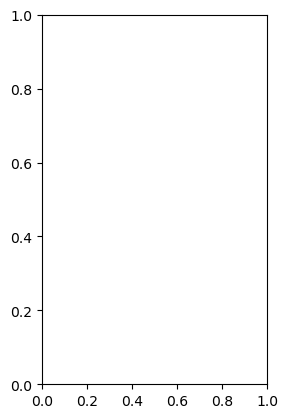

In [47]:
features = data.columns.tolist()[2:]
for feature in features:
    visualize(feature)

In [48]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data.Classification)
data['categorical_label'] = le.transform(data.Classification)
data['categorical_label'] = data['categorical_label'].astype(int)
data.head(2)
#inverse_transform ile de label'ları geri alabiliriz.  le.inverse_transform(df['categorical_label'])


,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree,Length,Word_count,mean_word_length,mean_sent_length,categorical_label
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...,126,1,126.0,126.0,1
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,111,5,21.4,111.0,1


In [49]:
data = data[['JobRefNo','DigerPozisyon','Qualifications','Classification','Qualifications_HtmlFree','categorical_label','Length','Word_count','mean_word_length','mean_sent_length']]

In [50]:
data.columns.tolist()[6:]

['Length', 'Word_count', 'mean_word_length', 'mean_sent_length']

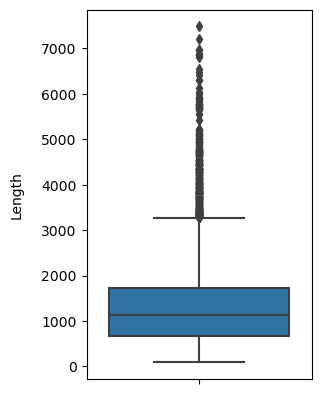

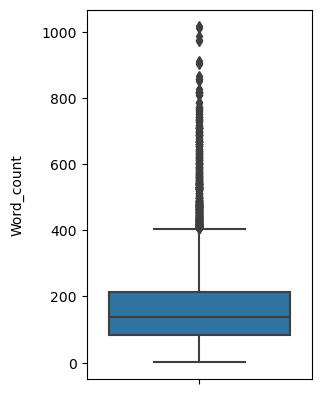

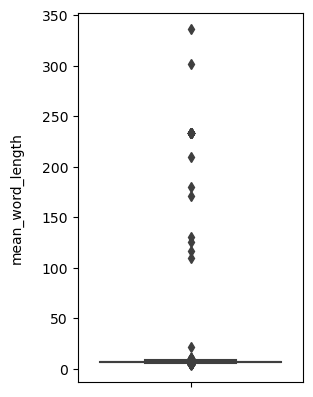

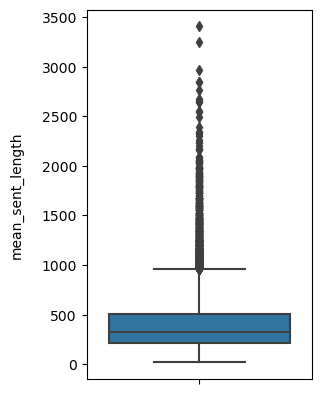

In [51]:
features = data.columns.tolist()[6:]
for feature in features:
    visualize(feature)

## Term Frequency Analysis
Examining the most frequently occuring words is one of the most popular systems of Text analytics. For example, in a sentiment analysis problem, a positive text is bound to have words like 'good', 'great', 'nice', etc. more in number than other words that imply otherwise.

*Note*: Term Frequencies are more than counts and lenghts, so the first requirement is to preprocess the text

In [52]:
df = data.drop(features, axis=1)
df.head()

,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree,categorical_label
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...,1
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,1
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri,Şartlar 08.30 - 18.30 arası mesai saatleri. Sa...,1
3,3463995,Full Stack Developer,<p>Yeditek Yeni Dijital Teknolojiler A.Ş.</p><...,Bilgi Teknolojileri,Yeditek Yeni Dijital Teknolojiler A.Ş. Yeditek...,1
4,3463739,Multimedya Tasarım Uzmanı,<p>Türkiye'de eğitim teknolojileri alanının il...,Bilgi Teknolojileri,Türkiye'de eğitim teknolojileri alanının ilk v...,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   JobRefNo                 15000 non-null  int64 
 1   DigerPozisyon            15000 non-null  object
 2   Qualifications           15000 non-null  object
 3   Classification           15000 non-null  object
 4   Qualifications_HtmlFree  15000 non-null  object
 5   categorical_label        15000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 703.2+ KB


There is no missing data, therefore, we can move to the next stage. For Term frequency analysis, it is essential that the text data be preprocessed.
* Lowercase
* Remove punctutations
* Stopword removal

In [54]:
stopwordList = stopwords.words('english') + stopwords.words('turkish')


In [55]:
stopwords.words('turkish')

['acaba',
 'ama',
 'aslında',
 'az',
 'bazı',
 'belki',
 'biri',
 'birkaç',
 'birşey',
 'biz',
 'bu',
 'çok',
 'çünkü',
 'da',
 'daha',
 'de',
 'defa',
 'diye',
 'eğer',
 'en',
 'gibi',
 'hem',
 'hep',
 'hepsi',
 'her',
 'hiç',
 'için',
 'ile',
 'ise',
 'kez',
 'ki',
 'kim',
 'mı',
 'mu',
 'mü',
 'nasıl',
 'ne',
 'neden',
 'nerde',
 'nerede',
 'nereye',
 'niçin',
 'niye',
 'o',
 'sanki',
 'şey',
 'siz',
 'şu',
 'tüm',
 've',
 'veya',
 'ya',
 'yani']

In [82]:
def clean(review):
    
    review = re.sub(r'(?<![a-zA-ZçÇğĞıİöÖşŞüÜ])\w+|\w+(?![a-zA-ZçÇğĞıİöÖşŞüÜ])', ' ', review)
    review = review.lower()
    review = review.replace('&nbsp;', ' ').replace('“', ' ').replace('·', ' ').replace('i̇','i')
    review = review.replace('•', ' ').replace('\xa0', ' ')
    review = review.replace('”', ' ').replace('nan', '').replace('\r', '').replace('’', ' ')
    review = " ".join([word for word in review.split() if word not in stopwordList])
    
    return review

In [92]:
def tokenize(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r"#(\w+)", '', text)
    text = re.sub(r"@(\w+)", '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip().lower()
    text = text.replace('&nbsp;', ' ').replace('“', ' ').replace('·', ' ').replace('i̇','i')
    text = text.replace('•', ' ').replace('\xa0', ' ')
    text = text.replace('”', ' ').replace('nan', '').replace('\r', '').replace('’', ' ')
    text = " ".join([word for word in text.split() if word not in stopwordList])
    return text

In [93]:
tokenize(data.iloc[7]['Qualifications_HtmlFree'])

'genel nitelikler üniversitelerin ilgili bölümlerinden mezun tercihen turizm sektöründe ilgili pozisyonda 2 yıl deneyimli logo mc opera program uygulamalarına hakim sistem veveya ağ yönetimi konusunda deneyim sahibi bilgi gizliliği ilkesine önem veren windows server işletim sistemlerine hakim doım ms sql server bilgisine sahip iyi derecede ingilizce bilen iş tanimi kurum sistem alt yapısını oluşturan bileşenlerin depolama yedekleme ağ iletişim sanallaştırma kamera sistemleri vb bakım yönetim izleme faaliyetlerini gerçekleştirmek temel bilgisayar doım işletim sistemi arızalarını tespit edip gidermek gerektiğinde kablolama parça değişimi yapmak sistemlerde düzenli kontrolleri gerçekleştirerek olası problemleri önceden tespit etmek bilgi güvenliği siber güvenlik konularında mevcut sistem altyapıları olası türlü açıklara karşı güvenli tutmak mevcut uygulamaların teknik altyapısını iyileştirecek çözümler bulunmasını sağlamak hotel overview swissotel cesme resort spa located izmir çeşme offe

In [87]:
data.iloc[7]['Qualifications_HtmlFree']

'GENEL NİTELİKLER Üniversitelerin ilgili bölümlerinden mezun, Tercihen Turizm sektöründe ilgili pozisyonda en az 2 yıl deneyimli, Logo, MC, Opera Program Uygulamalarına hakim, Sistem ve/veya ağ yönetimi konusunda deneyim sahibi, Bilgi Gizliliği İlkesine önem veren, Windows Server İşletim Sistemlerine hakim, Donanım ve MS SQL Server bilgisine sahip, İyi derecede İngilizce bilen. İŞ TANIMI Kurum sistem alt yapısını oluşturan tüm bileşenlerin (depolama, yedekleme, Ağ, iletişim, sanallaştırma, kamera sistemleri vb) bakım, yönetim ve izleme faaliyetlerini gerçekleştirmek, Temel bilgisayar donanım ve işletim sistemi arızalarını tespit edip gidermek, gerektiğinde kablolama ve parça değişimi yapmak, Sistemlerde düzenli kontrolleri gerçekleştirerek olası problemleri önceden tespit etmek, Bilgi güvenliği ve siber güvenlik konularında mevcut sistem ve altyapıları olası her türlü açıklara karşı güvenli tutmak, Mevcut uygulamaların teknik altyapısını iyileştirecek çözümler bulunmasını sağlamak. Hot

In [94]:
data['Clean'] = data['Qualifications_HtmlFree'].apply(tokenize)
data.head(3)

/var/folders/r6/1jr_vtfx3zg7ypvnvh2p1s0w0000gp/T/ipykernel_46747/1626485860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clean'] = data['Qualifications_HtmlFree'].apply(tokenize)


,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree,categorical_label,Length,Word_count,mean_word_length,mean_sent_length,Clean,Clean_lists
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...,1,126,1,126.000000,126.0,3464105346410534641053464105346410534641053464...,[346410534641053464105346410534641053464105346...
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,1,111,5,21.400000,111.0,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,"[sskjdkjsdksajl, sksakjdlkajdladl, dskjlksjlks..."
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri,Şartlar 08.30 - 18.30 arası mesai saatleri. Sa...,1,623,81,6.679012,88.0,şartlar 0830 1830 arası mesai saatleri sadece ...,"[şartlar, 08, 30, -, 18, 30, arası, mesai, saa..."


In [95]:
data.to_csv('../../Data/cleanedJobs.csv', index=False)

In [59]:
def corpus(text):
    text_list = text.split()
    return text_list

In [60]:
data['Clean_lists'] = data['Clean'].apply(corpus)
data.head(3)

/var/folders/r6/1jr_vtfx3zg7ypvnvh2p1s0w0000gp/T/ipykernel_46747/368860482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clean_lists'] = data['Clean'].apply(corpus)


,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree,categorical_label,Length,Word_count,mean_word_length,mean_sent_length,Clean,Clean_lists
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...,1,126,1,126.000000,126.0,3464105346410534641053464105346410534641053464...,[346410534641053464105346410534641053464105346...
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,1,111,5,21.400000,111.0,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,"[sskjdkjsdksajl, sksakjdlkajdladl, dskjlksjlks..."
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri,Şartlar 08.30 - 18.30 arası mesai saatleri. Sa...,1,623,81,6.679012,88.0,şartlar 08 30 - 18 30 arası mesai saatleri sad...,"[şartlar, 08, 30, -, 18, 30, arası, mesai, saa..."


In [61]:
corpus = []
for i in trange(data.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += data['Clean_lists'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 315072.19it/s]


2073113

In [62]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('sahip', 14114),
 ('olan', 13940),
 ('ş', 12636),
 ('tercihen', 10519),
 ('olarak', 9159),
 ('ilgili', 9110),
 ('konusunda', 8568),
 ('takip', 8566),
 ('sahibi', 8446),
 ('bir', 8207)]

In [63]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

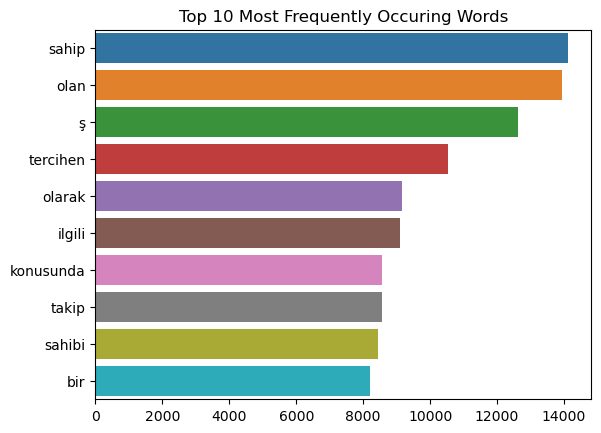

In [64]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

## Most Frequently occuring N_grams

**What is an N-gram?** <br>
An n-gram is sequence of n words in a text. Most words by themselves may not present the entire context. Typically adverbs such as 'most' or 'very' are used to modify verbs and adjectives. Therefore, n-grams help analyse phrases and not just words which can lead to better insights.
<br>
> A **Bi-gram** means two words in a sequence. 'Very good' or 'Too great'<br>
> A **Tri-gram** means three words in a sequence. 'How was your day' would be broken down to 'How was your' and 'was your day'.<br>

For separating text into n-grams, we will use `CountVectorizer` from Sklearn

In [65]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['Clean'])

In [66]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

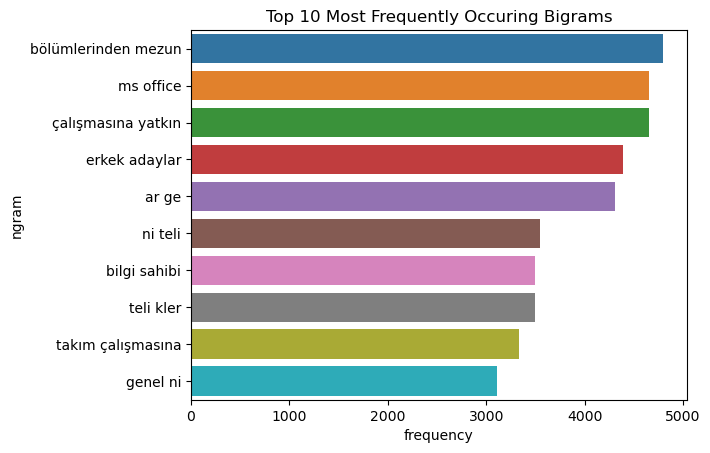

In [67]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [71]:
data.head(20)

,JobRefNo,DigerPozisyon,Qualifications,Classification,Qualifications_HtmlFree,categorical_label,Length,Word_count,mean_word_length,mean_sent_length,Clean,Clean_lists
0,3464108,Bilgisayar Mühendisi,<p>3464105346410534641053464105346410534641053...,Bilgi Teknolojileri,3464105346410534641053464105346410534641053464...,1,126,1,126.000000,126.000000,3464105346410534641053464105346410534641053464...,[346410534641053464105346410534641053464105346...
1,3464068,Yazılım Geliştirme Elemanı,<p>sskjdkjsdksajl sksakjdlkajdladl dskjlksjlks...,Bilgi Teknolojileri,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,1,111,5,21.400000,111.000000,sskjdkjsdksajl sksakjdlkajdladl dskjlksjlksajl...,"[sskjdkjsdksajl, sksakjdlkajdladl, dskjlksjlks..."
2,3464018,Grafik Tasarımcı,<p>Şartlar</p><p>08.30 - 18.30 arası mesai saa...,Bilgi Teknolojileri,Şartlar 08.30 - 18.30 arası mesai saatleri. Sa...,1,623,81,6.679012,88.000000,şartlar 08 30 - 18 30 arası mesai saatleri sad...,"[şartlar, 08, 30, -, 18, 30, arası, mesai, saa..."
3,3463995,Full Stack Developer,<p>Yeditek Yeni Dijital Teknolojiler A.Ş.</p><...,Bilgi Teknolojileri,Yeditek Yeni Dijital Teknolojiler A.Ş. Yeditek...,1,698,90,6.766667,138.800000,yeditek yeni dijital teknolojiler ş yeditek en...,"[yeditek, yeni, dijital, teknolojiler, ş, yedi..."
4,3463739,Multimedya Tasarım Uzmanı,<p>Türkiye'de eğitim teknolojileri alanının il...,Bilgi Teknolojileri,Türkiye'de eğitim teknolojileri alanının ilk v...,1,2426,311,6.729904,484.000000,türkiye eğitim teknolojileri alanının ilk öncü...,"[türkiye, eğitim, teknolojileri, alanının, ilk..."
5,3463723,Kıdemli Yazılım Geliştirme Uzmanı,"<p class=""x_MsoNormal"">Geliştirmek olduğumuz ç...",Bilgi Teknolojileri,Geliştirmek olduğumuz çok büyük bir projenin ö...,1,1594,193,7.238342,198.000000,geliştirmek olduğumuz büyük bir projenin öneml...,"[geliştirmek, olduğumuz, büyük, bir, projenin,..."
6,3463703,Grafik Tasarım Uzmanı,<p>Saç Ekimi ve Estetik alanında faaliyet göst...,Bilgi Teknolojileri,Saç Ekimi ve Estetik alanında faaliyet göstere...,1,927,121,6.669421,115.000000,saç ekimi estetik alanında faaliyet gösteren ş...,"[saç, ekimi, estetik, alanında, faaliyet, göst..."
7,3463683,Bilgi İşlem Uzmanı,"<p class=""x_x_x_x_x_x_x_xxxmsonormal""><strong>...",Bilgi Teknolojileri,GENEL NİTELİKLER Üniversitelerin ilgili bölüml...,1,1441,189,6.624339,359.500000,genel ni teli kler üniversitelerin ilgili bölü...,"[genel, ni, teli, kler, üniversitelerin, ilgil..."
8,3463593,Bilgi Teknolojileri / IT Uzmanı,"<p class=""x_x_x_xxxxxxmsonormal"">Ankutsan A.Ş....",Bilgi Teknolojileri,Ankutsan A.Ş. olarak 2002 yılında Antalya’da b...,1,2976,359,7.253482,227.461538,ankutsan ş olarak 2002 yılında antalya başlaya...,"[ankutsan, ş, olarak, 2002, yılında, antalya, ..."
9,3463554,Grafiker,"<p>Kutu ,Ambalaj ve Etiket grafik tasarımları ...",Bilgi Teknolojileri,"Kutu ,Ambalaj ve Etiket grafik tasarımları yap...",1,316,44,6.181818,316.000000,kutu ambalaj etiket grafik tasarımları yapacak...,"[kutu, ambalaj, etiket, grafik, tasarımları, y..."


In [38]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(analyzer='word')
data_Transformed =cv.fit_transform(data['Clean'])
df_dtm = pd.DataFrame(data_Transformed.toarray(), columns=cv.get_feature_names_out())
df_dtm.head(3)

,00,000,0000,00011057699,00011357627,00013700881,001,0030,01,0100,...,zveri,zverili,zveriyle,zwangsvollstreckung,zwischen,zyaar,zye,zyein,zyer,zynq
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
len(cv.get_feature_names_out())

69037